In [1]:
import pandas as pd

circuits = pd.read_csv('circuits.csv', encoding="utf-8")
drivers = pd.read_csv('drivers.csv', encoding="utf-8")
lap_times = pd.read_csv('lap_times.csv', encoding="utf-8")
pit_stops = pd.read_csv('pit_stops.csv', encoding="utf-8")
qualifying = pd.read_csv('qualifying.csv', encoding="utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")


In [2]:
merged_data = pd.merge(pit_stops, results, on=['raceId', 'driverId'])


In [11]:
import pandas as pd
print(pd.__version__)
import statsmodels
print(statsmodels.__version__)


2.0.3
0.12.2


In [12]:
!pip install --upgrade pandas statsmodels


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [17]:
# This will print out all the column names in your merged_data DataFrame
print(merged_data.columns)



Index(['raceId', 'driverId', 'stop', 'lap', 'time_x', 'duration',
       'milliseconds_x', 'resultId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_y',
       'milliseconds_y', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Assuming your data is in a DataFrame called df
X = merged_data[['milliseconds_x']]  # Predictor variable
y = merged_data['positionOrder']  # Outcome variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Now you can make predictions on the test data
y_pred = lr.predict(X_test)

# Create a summary DataFrame
summary_data = {
    'Coefficient': lr.coef_,
    'Intercept': lr.intercept_,
    'R-Squared': metrics.r2_score(y_test, y_pred),
    'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
    'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
}

summary_df = pd.DataFrame(summary_data)

# Transpose the DataFrame for a more familiar regression table layout
summary_df = summary_df.T

# Now print or save the summary_df DataFrame to a file
print(summary_df)

                                    0
Coefficient             -9.080870e-07
Intercept                1.068117e+01
R-Squared                2.278182e-04
Mean Absolute Error      4.909385e+00
Mean Squared Error       3.295954e+01
Root Mean Squared Error  5.741040e+00


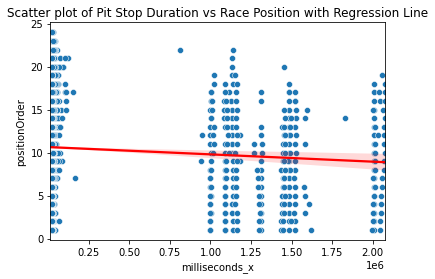

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data' is your DataFrame
sns.scatterplot(x='milliseconds_x', y='positionOrder', data=merged_data)
sns.regplot(x='milliseconds_x', y='positionOrder', data=merged_data, scatter=False, color='red')
plt.title('Scatter plot of Pit Stop Duration vs Race Position with Regression Line')
plt.show()


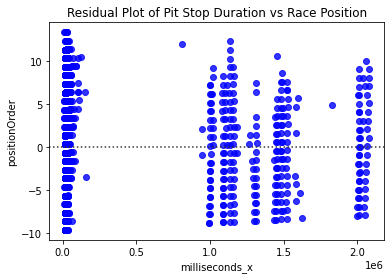

In [9]:
sns.residplot(x='milliseconds_x', y='positionOrder', data=merged_data, color='blue')
plt.title('Residual Plot of Pit Stop Duration vs Race Position')
plt.show()


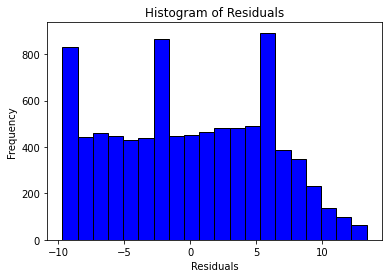

In [14]:
import numpy as np

# Assuming 'lr' is your linear regression model and 'X' and 'y' are your data
y_pred = lr.predict(X)
residuals = y - y_pred

plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [9]:
import nbformat

# Load the notebook
with open("testing.ipynb", "r", encoding="utf-8") as f:
    notebook = f.read()

# Validate the notebook
try:
    nbformat.reads(notebook, as_version= 4)  # Here, '4' is the nbformat version. Adjust if needed.
    print("The notebook is valid!")
except nbformat.ValidationError as e:
    print(f"Validation error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

The notebook is valid!


In [6]:
import nbformat
print(nbformat.__version__)

5.8.0
